In [105]:
import pandas as pd
import plotly as plt
import plotly.express as px
import plotly.graph_objs as go
from typing import Optional, List

# Exploration
## Loading

In [106]:
columns = pd.read_csv("../data/_columns.csv")
bans = pd.read_csv("../data/bans.csv")
gold = pd.read_csv("../data/gold.csv")
kills = pd.read_csv("../data/kills.csv")
matchinfo = pd.read_csv("../data/matchinfo.csv")
monsters = pd.read_csv("../data/monsters.csv")
structures = pd.read_csv("../data/structures.csv")

pickban dataset, put picks along bans

In [107]:
structures['Type'].unique()

array(['BASE_TURRET', 'NEXUS_TURRET', 'INNER_TURRET', 'OUTER_TURRET',
       'FOUNTAIN_TURRET', nan, 'INHIBITOR'], dtype=object)

In [108]:
structures

Address     Team    Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  27.542   
1       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.269   
2       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  33.583   
3       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  23.038   
4       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  16.556   
...                                                   ...      ...     ...   
121381  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  22.992   
121382  https://matchhistory.na.leagueoflegends.com/en...  rInhibs     NaN   
121383  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  37.152   
121384  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  41.194   
121385  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  37.880   

            Lane          Type  
0       MID_LANE   BASE_TURRET  
1       MID_LANE  NEXUS_TURRET  
2       BOT_LANE  INNER_TURRET  
3       TOP_LANE  INNER_TURRET  
4       BOT_LANE  OUTER_TURRET  
...          ...           ...  
121381  TOP_LANE     INHIBITOR  
121382       NaN           NaN  
121383  BOT_LANE     INHIBITOR  
121384  TOP_LANE     INHIBITOR  
121385  MID_LANE     INHIBITOR  

[121386 rows x 5 columns]

In [109]:
structures

Address     Team    Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  27.542   
1       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.269   
2       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  33.583   
3       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  23.038   
4       http://matchhistory.na.leagueoflegends.com/en/...  bTowers  16.556   
...                                                   ...      ...     ...   
121381  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  22.992   
121382  https://matchhistory.na.leagueoflegends.com/en...  rInhibs     NaN   
121383  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  37.152   
121384  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  41.194   
121385  https://matchhistory.na.leagueoflegends.com/en...  rInhibs  37.880   

            Lane          Type  
0       MID_LANE   BASE_TURRET  
1       MID_LANE  NEXUS_TURRET  
2       BOT_LANE  INNER_TURRET  
3       TOP_LANE  INNER_TURRET  
4       BOT_LANE  OUTER_TURRET  
...          ...           ...  
121381  TOP_LANE     INHIBITOR  
121382       NaN           NaN  
121383  BOT_LANE     INHIBITOR  
121384  TOP_LANE     INHIBITOR  
121385  MID_LANE     INHIBITOR  

[121386 rows x 5 columns]

In [110]:
data_dfs = [bans,gold,kills,matchinfo,monsters,structures]
for df in data_dfs:
    print(df.columns)

Index(['Address', 'Team', 'ban_1', 'ban_2', 'ban_3', 'ban_4', 'ban_5'], dtype='object')
Index(['Address', 'Type', 'min_1', 'min_2', 'min_3', 'min_4', 'min_5', 'min_6',
       'min_7', 'min_8', 'min_9', 'min_10', 'min_11', 'min_12', 'min_13',
       'min_14', 'min_15', 'min_16', 'min_17', 'min_18', 'min_19', 'min_20',
       'min_21', 'min_22', 'min_23', 'min_24', 'min_25', 'min_26', 'min_27',
       'min_28', 'min_29', 'min_30', 'min_31', 'min_32', 'min_33', 'min_34',
       'min_35', 'min_36', 'min_37', 'min_38', 'min_39', 'min_40', 'min_41',
       'min_42', 'min_43', 'min_44', 'min_45', 'min_46', 'min_47', 'min_48',
       'min_49', 'min_50', 'min_51', 'min_52', 'min_53', 'min_54', 'min_55',
       'min_56', 'min_57', 'min_58', 'min_59', 'min_60', 'min_61', 'min_62',
       'min_63', 'min_64', 'min_65', 'min_66', 'min_67', 'min_68', 'min_69',
       'min_70', 'min_71', 'min_72', 'min_73', 'min_74', 'min_75', 'min_76',
       'min_77', 'min_78', 'min_79', 'min_80', 'min_81', 'min_82'

In [111]:
gold.columns
gold
#LeagueofLegends.golddiff[0]

Address            Type  \
0      http://matchhistory.na.leagueoflegends.com/en/...        golddiff   
1      http://matchhistory.na.leagueoflegends.com/en/...        golddiff   
2      http://matchhistory.na.leagueoflegends.com/en/...        golddiff   
3      http://matchhistory.na.leagueoflegends.com/en/...        golddiff   
4      http://matchhistory.na.leagueoflegends.com/en/...        golddiff   
...                                                  ...             ...   
99055  https://matchhistory.euw.leagueoflegends.com/e...  goldredSupport   
99056  https://matchhistory.euw.leagueoflegends.com/e...  goldredSupport   
99057  https://matchhistory.na.leagueoflegends.com/en...  goldredSupport   
99058  https://matchhistory.na.leagueoflegends.com/en...  goldredSupport   
99059  https://matchhistory.na.leagueoflegends.com/en...  goldredSupport   

       min_1  min_2  min_3  min_4  min_5  min_6  min_7  min_8  ...  min_86  \
0          0      0    -14    -65   -268   -431   -488   -789  ...     NaN   
1          0      0    -26    -18    147    237   -152     18  ...     NaN   
2          0      0     10    -60     34     37    589   1064  ...     NaN   
3          0      0    -15     25    228     -6   -243    175  ...     NaN   
4         40     40     44    -36    113    158   -121   -191  ...     NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...  ...     ...   
99055    500    500    566    801   1004   1234   1463   1674  ...     NaN   
99056    500    500    587    790   1107   1335   1472   1616  ...     NaN   
99057    500    500    585    770    976   1222   1446   1627  ...     NaN   
99058    500    500    592    788   1006   1251   1490   1704  ...     NaN   
99059    500    500    585    793    998   1201   1373   1619  ...     NaN   

       min_87  min_88  min_89  min_90  min_91  min_92  min_93  min_94  min_95  
0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
...       ...     ...     ...     ...     ...     ...     ...     ...     ...  
99055     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
99056     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
99057     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
99058     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
99059     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[99060 rows x 97 columns]

It seems that LeagueofLegends already aggregates all the data, things with a list are strings though.
I think for our usecase we can simply ignore LeagueofLegends, using the separated data will be clearer.
## Making ids
We should replace the "Address" with an id

In [112]:
match_ids = matchinfo["Address"].reset_index()
match_ids = match_ids.rename(columns={"index":"match_id"})

Testing code for the replacement:
```python
kills=kills.merge(match_ids, on="Address",how="left")
kills.drop(columns=["Address"],inplace=True)
```

In [113]:
for i in range(len(data_dfs)):
    data_dfs[i]=data_dfs[i].merge(match_ids, on="Address",how="left")
    data_dfs[i].drop(columns=["Address"],inplace=True)
bans,gold,kills,matchinfo,monsters,structures = data_dfs
    


## Plan
Prepare datasets, do any needed preprocessing.

Prepare large views in advance? Like map events.
## Kills
- Change coordinates to numeric
- replace Team by clear BLUE or RED

In [114]:
# Convert kill positions to numbers, coerce will convert or if not possible replace with NaN
kills['x_pos'] = pd.to_numeric(kills['x_pos'],errors='coerce')
kills['y_pos'] = pd.to_numeric(kills['y_pos'],errors='coerce')
kills['Team'] = kills['Team'].apply(lambda x: 'RED' if x[0]=='r' else 'BLUE')

In [115]:
heatmap_binsize = 100
fix_g=kills[kills['match_id']==7619]

In [116]:
def add_map_bg(fig):
    fig.update_traces(opacity=0.66)
    fig.update_layout(
        images=[
            dict(
                source="..\\ressources\\SummonersRift.webp",  # Path or URL to the PNG/SVG image
                xref="paper",  # Coordinates system: 'paper' means relative to the paper's area
                yref="paper",
                x=0,  # Positioning the image
                y=1,  # Positioning the image
                sizex=1,  # Image width as a fraction of plot area
                sizey=1,  # Image height as a fraction of plot area
                opacity=0.3,  # Image transparency (0 = fully transparent, 1 = fully opaque)
                layer="below"  # Ensures the image stays below the plot
            )
        ],
    )
    return fig

In [117]:
def combine_assists(row: pd.Series, assist_cols: List[str]) -> Optional[str]:
    assists = [str(row[col]) for col in assist_cols if pd.notna(row[col])]
    return ", ".join(assists) if assists else None

def format_time(minutes: float) -> str:
    total_seconds = int(minutes * 60)
    h = total_seconds // 3600
    m = (total_seconds % 3600) // 60
    s = total_seconds % 60
    if h > 0:
        return f"{h:02}:{m:02}:{s:02}"
    else:
        return f"{m}:{s}"

In [118]:
def get_kill_plot(df: pd.DataFrame) -> go.Figure:
    assist_columns = ["Assist_1", "Assist_2", "Assist_3", "Assist_4"]
    assists = df.apply(lambda x: combine_assists(x, assist_columns), axis=1)
    formatted_time = df['Time'].apply(lambda x: format_time(float(x)))
    fig = px.scatter(
        data_frame=df,
        x=df['x_pos'],
        y=df['y_pos'],
        title="Deaths",
        width=800,
        height=800,
        #color=df['Team'].apply(lambda x: 'RED' if x=='BLUE' else 'BLUE'), # Binds colour to victim (flip), more intuitive for the one looking
        color='Team',
        color_discrete_map={'RED':'blue','BLUE':'red'},
        labels={'Team':'Team','BLUE': 'Red', 'RED': 'Blue'},
        hover_name='Victim',
        hover_data={
            'x_pos': False,
            'y_pos': False,
            'Team': False,
            'At ': formatted_time,
            'Killer': True,
            'Assists': assists,
        }
    )
    fig.update_traces(marker=dict(size=15))
    add_map_bg(fig)
    return fig

In [119]:
fig = get_kill_plot(fix_g)
# Add timeframe
fig.show()

In [120]:
def get_kill_heatmap(df: pd.DataFrame, heatmap_binsize: int):
    fig=px.density_heatmap(
        x=df['x_pos'],
        y=df['y_pos'],
        nbinsx=heatmap_binsize, # Define "size" of blocks
        nbinsy=heatmap_binsize,
        title="Kills",
        width=800,
        height=800,
        color_continuous_scale='Viridis'
        )
    add_map_bg(fig)
    return fig


### Turret positions (x,y)
Red Top 1 - (1000,10000)
Red Top 2 - (1600, 6200)
Red Top 3 - (1200, 4000)
Red Top inhib - (1100, 3500)
Red Mid 1 - (5800, 6000)
Red Mid 2 - (5200,4300)
Red Mid 3 - (3700, 3200)
Red Mid inhib - (3300,3200)
Red Bot 1 - (10500, 700)
Red Bot 2 - (6800, 1500)
Red Bot 3 - (4200,1200)
Red Bot inhib - (3400,1200)
Red Nexus 1 - (1700,2200)
Red Nexus 2 - (2100, 1700)

In [121]:
fig = get_kill_heatmap(kills,heatmap_binsize)
fig.show()

```python
fig.update_layout(
    yaxis=dict(scaleanchor="x")  # Locks x and y scaling
) 
```
This would lock x and y to equal scaling.

Summoners' Rift image from: https://www.reddit.com/r/leagueoflegends/comments/pl92ho/vector_map_of_summoners_rift_wip/

Things to filter by: blue team, red team, team name, player, by minute N, between minutes N and T.

Scatterplot version for single games.
## Monsters

We have elemental drakes. I suggest adding a column to check if it's a drake at all and one to check if it's a first drake, soul etc...
I would do a distribution of red/blue time for who takes first drake/herald/baron, as well as one giving the average time at which the first drake is taken, depending on its type.

In [122]:
monsters

Team    Time         Type  match_id
0      bDragons  37.267       DRAGON         0
1      bDragons  32.545       DRAGON         1
2      bDragons  26.177       DRAGON         1
3      bDragons  19.119       DRAGON         1
4      bDragons  24.577       DRAGON         2
...         ...     ...          ...       ...
44243  rHeralds  17.307  RIFT_HERALD      7603
44244  rHeralds  14.191  RIFT_HERALD      7608
44245  rHeralds  16.258  RIFT_HERALD      7612
44246  rHeralds  17.243  RIFT_HERALD      7616
44247  rHeralds  16.912  RIFT_HERALD      7617

[44248 rows x 4 columns]

In [123]:
monsters['Subtype'] = monsters['Type'].apply(lambda x: x.split('_')[0] if 'DRAGON' in x and '_' in x else None)
monsters['Type'] = monsters['Type'].apply(lambda x: 'DRAGON' if 'DRAGON' in x else x)
drake_rename = {'FIRE':'INFERNAL','EARTH':'MOUNTAIN','WATER':'OCEAN','AIR':'CLOUD'}
monsters['Subtype'] = monsters['Subtype'].apply(lambda x: drake_rename[x] if x in drake_rename.keys() else x)

In [124]:
monsters['Team'] = monsters['Team'].apply(lambda x: 'RED' if x[0]=='r' else 'BLUE')

In [125]:
# Add a column 'First' for faster lookup, no need to groupby and aggregate twice and stuff
#monsters['First'] = monsters.loc[monsters.groupby(['match_id','Type'])['Time'].idxmin()] = True

In [126]:
# Average timestamp for killing first drake per element
#monsters.loc[monsters.groupby(['match_id','Type'])['Time'].idxmin()].groupby(['Subtype','Team']).aggregate({'Time':'mean'})
time_monst=monsters.loc[monsters.groupby(['match_id','Type'])['Time'].idxmin()].groupby(['Subtype']).aggregate({'Time':'mean'}).sort_values('Time').reset_index()
time_monst_cols = {'INFERNAL':'red','OCEAN':'blue','CLOUD':'yellow','MOUNTAIN':'green'}

In [127]:
time_monst

Subtype       Time
0  INFERNAL  10.600524
1     OCEAN  12.114895
2  MOUNTAIN  13.036126
3     CLOUD  14.422685

In [128]:
import base64

def encode_image_to_base64(path):
    with open(path, 'rb') as f:
        image_bytes = f.read()
    encoded = base64.b64encode(image_bytes).decode()
    return f'data:image/png;base64,{encoded}'

''
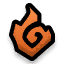

In [129]:
encode_image_to_base64("../ressources/MAPICONS/INFERNAL.png")

In [130]:
fig=px.bar(time_monst,
            x="Subtype",
            y="Time",
            color="Subtype",
            width=500,
            color_discrete_map=time_monst_cols)
fig.update_traces(width=0.85).update_xaxes(showticklabels=False).update_layout(showlegend=False)
for elem in time_monst['Subtype']:
    fig.add_layout_image(
        source=encode_image_to_base64(f"../ressources/mapicons/{elem}.png"),
        x=elem,
        y=0.05,  # just below the chart
        xref="x",
        yref="paper",
        sizex=0.5,
        sizey=0.1,
        xanchor="center",
        yanchor="top",
        layer="above"
    )
fig.show()

In [131]:
monsters.loc[monsters.groupby(['match_id','Type'])['Time'].idxmin()].groupby(['Type','Team']).aggregate({'Time':'mean'})

Time
Type         Team           
BARON_NASHOR BLUE  27.700500
             RED   27.475341
DRAGON       BLUE  12.291053
             RED   12.069410
RIFT_HERALD  BLUE  14.525390
             RED   14.406417

In [132]:
monsters[monsters['match_id']==7619].sort_values(['Time'])

Team    Time          Type  match_id   Subtype
22131  BLUE  16.195   RIFT_HERALD      7619      None
36789   RED  16.217        DRAGON      7619  MOUNTAIN
14126  BLUE  22.787        DRAGON      7619  INFERNAL
42359   RED  26.427  BARON_NASHOR      7619      None
36788   RED  29.624        DRAGON      7619     CLOUD
42360   RED  35.277  BARON_NASHOR      7619      None
36787   RED  35.963        DRAGON      7619     ELDER

## Timeline:
A timeline over time. For individual games inspired from spectator one. Bar with event related icon at referred minute.
For sets of games or general view use average time for event N. Note that for aggregate views events would be drake_0, drake_1, ... same for baron and turrets.

Click on it to make it on multiple lines and have the data less condensed.

For the agglomeration, add cardinality of item in each individual dataset.
Build "Events" dataset taking only the event identification + game_id + cardinality + timestamp from these datasets.

In [133]:
structures['Team'] = structures['Team'].apply(lambda x: 'RED' if (x[0]=='r' or x[0]=='R') else 'BLUE')
structures = structures.dropna()

In [134]:
monsters['cardinality'] = monsters.sort_values("Time").groupby("match_id").cumcount()
kills['cardinality'] = kills.sort_values("Time").groupby("match_id").cumcount()
structures['cardinality'] = structures.sort_values("Time").groupby("match_id").cumcount()
structures['type_cardinality'] = structures.sort_values("Time").groupby(["match_id","Type"]).cumcount().astype(int)

C:\Users\Loïc\AppData\Local\Temp\ipykernel_14564\2106814260.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Loïc\AppData\Local\Temp\ipykernel_14564\2106814260.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
structures

Team    Time      Lane          Type  match_id  cardinality  \
0       BLUE  27.542  MID_LANE   BASE_TURRET         0            8   
1       BLUE  39.269  MID_LANE  NEXUS_TURRET         0           13   
2       BLUE  33.583  BOT_LANE  INNER_TURRET         0           10   
3       BLUE  23.038  TOP_LANE  INNER_TURRET         0            7   
4       BLUE  16.556  BOT_LANE  OUTER_TURRET         0            3   
...      ...     ...       ...           ...       ...          ...   
121380   RED  18.959  BOT_LANE     INHIBITOR      7617            6   
121381   RED  22.992  TOP_LANE     INHIBITOR      7617            9   
121383   RED  37.152  BOT_LANE     INHIBITOR      7619           10   
121384   RED  41.194  TOP_LANE     INHIBITOR      7619           16   
121385   RED  37.880  MID_LANE     INHIBITOR      7619           12   

        type_cardinality  
0                      0  
1                      0  
2                      2  
3                      1  
4                      2  
...                  ...  
121380                 0  
121381                 1  
121383                 0  
121384                 2  
121385                 1  

[113780 rows x 7 columns]

In [136]:
structures.loc[:,'Lane']

0         MID_LANE
1         MID_LANE
2         BOT_LANE
3         TOP_LANE
4         BOT_LANE
            ...   
121380    BOT_LANE
121381    TOP_LANE
121383    BOT_LANE
121384    TOP_LANE
121385    MID_LANE
Name: Lane, Length: 113780, dtype: object

In [137]:
structures['Lane'] = structures['Lane'].apply(lambda x: x.split('_')[0])
structures['Type'] = structures['Type'].apply(lambda x: x.split('_')[0])

C:\Users\Loïc\AppData\Local\Temp\ipykernel_14564\3832433758.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Loïc\AppData\Local\Temp\ipykernel_14564\3832433758.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
structures['Type'] = structures.apply(lambda row: f"NEXUS{row['type_cardinality'] % 2 + 1}" if row['Type'] == 'NEXUS' else row['Type'],axis=1)

C:\Users\Loïc\AppData\Local\Temp\ipykernel_14564\1815001829.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
matchinfo[matchinfo['match_id']==7619]

League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
7619    OPL  2018  Spring  Season         TTC        0        1        LGC   

      gamelength  blueTop  ... redTopChamp redJungle redJungleChamp redMiddle  \
7619          42  Papryze  ...        Ornn     Sybol       JarvanIV    Claire   

     redMiddleChamp redADC redADCChamp redSupport redSupportChamp match_id  
7619       Malzahar   Raid       Vayne      Decoy           Braum     7619  

[1 rows x 30 columns]

In [139]:
fix_s = structures[structures['match_id']==7619].sort_values('Time')
fix_s['Time'].astype(float,False)
fig = px.scatter(
    data_frame=fix_s,
    x='Time',
    y=[""] * len(fix_s),  # Keeps all points on a horizontal line
    color='Team',
    symbol='Type',
)
fig.update_traces(marker=dict(size=15))

In [66]:
import os

In [102]:
fix_s

Team    Time      Lane          Type  match_id
97381    RED  13.564  BOT_LANE  OUTER_TURRET      7619
51647   BLUE  13.644  TOP_LANE  OUTER_TURRET      7619
51649   BLUE  13.663  MID_LANE  OUTER_TURRET      7619
97380    RED  17.922  TOP_LANE  OUTER_TURRET      7619
51646   BLUE  18.042  BOT_LANE  OUTER_TURRET      7619
97379    RED  21.801  MID_LANE  OUTER_TURRET      7619
51648   BLUE  23.904  MID_LANE  INNER_TURRET      7619
97376    RED  28.844  BOT_LANE  INNER_TURRET      7619
97371    RED  32.298  MID_LANE  INNER_TURRET      7619
97377    RED  37.034  BOT_LANE   BASE_TURRET      7619
121383   RED  37.152  BOT_LANE     INHIBITOR      7619
97378    RED  37.761  MID_LANE   BASE_TURRET      7619
121385   RED  37.880  MID_LANE     INHIBITOR      7619
97374    RED  38.456  TOP_LANE  INNER_TURRET      7619
97372    RED  40.779  TOP_LANE   BASE_TURRET      7619
97373    RED  41.053  MID_LANE  NEXUS_TURRET      7619
121384   RED  41.194  TOP_LANE     INHIBITOR      7619
97375    RED  41.317  MID_LANE  NEXUS_TURRET      7619

In [174]:
fig = go.Figure()
previous_x = -100
previous_y = 0.33
y_values = []
# Add one image per event
for _, row in fix_s.iterrows():
    if row["Type"] == "INHIBITOR": struct = "INHIBITOR"
    else: struct  = "TURRET"
    if row["Team"] == "BLUE": team = "RED"
    else: team = "BLUE"
    img_path = f'../ressources/mapicons/{team}_{struct}.png'
    x = row['Time']
    if x-(previous_x+0.25) < 0: y = previous_y+0.33
    else: y = 0.33
    if os.path.exists(img_path):
        fig.add_layout_image(
            source=encode_image_to_base64(img_path),
            x=x,
            y=y,
            xref="x",
            yref="paper",
            sizex=0.75,         # Tune this based on spacing
            sizey=0.75,        # Controls vertical size
            xanchor="center",
            yanchor="top",
            layer="above"
        )
    else:
        print(f"Image not found: {img_path}")
    previous_x = x
    previous_y = y
    y_values.append(y)
fig.add_trace(go.Scatter(
            x=fix_s['Time'],
            y=y_values,
            mode='markers',
            marker=dict(size=30, color='rgba(0,0,0,0)'),  # invisible
            hoverinfo='text',
            text=[f"{row['Lane'] if "NEXUS" not in row['Type'] else row['Type']} {struct}<br>At: {format_time(row['Time'])}" for _, row in fix_s.iterrows()],
            showlegend=False
        ))

fig.update_layout(
    xaxis=dict(
        range=[fix_s['Time'].min() - 1, fix_s['Time'].max() + 1],  # pad the view
        title="Time",
        showline=True,
        showticklabels=True,
        tickmode='auto',
    ),
    yaxis=dict(
        visible=False,
    ),
    margin=dict(t=40, b=40),
    height=200,
)

In [147]:
fix_m = monsters[monsters['match_id']==7619].sort_values('Time')

In [148]:
fix_m

Team    Time          Type  match_id   Subtype  cardinality
22131  BLUE  16.195   RIFT_HERALD      7619      None            0
36789   RED  16.217        DRAGON      7619  MOUNTAIN            1
14126  BLUE  22.787        DRAGON      7619  INFERNAL            2
42359   RED  26.427  BARON_NASHOR      7619      None            3
36788   RED  29.624        DRAGON      7619     CLOUD            4
42360   RED  35.277  BARON_NASHOR      7619      None            5
36787   RED  35.963        DRAGON      7619     ELDER            6

In [173]:
fig = go.Figure()
y_values = []
# Add one image per event
previous_x = -100
previous_y = 0.50
for _, row in fix_m.iterrows():
    if row["Type"] == "INHIBITOR": struct = "INHIBITOR"
    else: struct  = "TURRET"
    if row["Team"] == "BLUE": team = "RED"
    else: team = "BLUE"
    img_path = f'../ressources/mapicons/{row["Team"]}_{row["Subtype"] if row["Subtype"] is not None else row["Type"]}.png'
    x = row['Time']
    if x-(previous_x+0.33) < 0: y = previous_y+0.4
    else: y = 0.50
    if os.path.exists(img_path):
        fig.add_layout_image(
            source=encode_image_to_base64(img_path),
            x=x,
            y=y,
            xref="x",
            yref="paper",
            sizex=0.75,         # Tune this based on spacing
            sizey=0.75,        # Controls vertical size
            xanchor="center",
            yanchor="top",
            layer="above"
        )
    else:
        print(f"Image not found: {img_path}")
    previous_x = x
    previous_y = y
    y_values.append(y)
fig.add_trace(go.Scatter(
            x=fix_m['Time'],
            y=y_values,
            mode='markers',
            marker=dict(size=30, color='rgba(0,0,0,0)'),  # invisible
            hoverinfo='text',
            text=[f"At: {format_time(row['Time'])}" for _, row in fix_s.iterrows()],
            showlegend=False
        ))

fig.update_layout(
    xaxis=dict(
        range=[fix_m['Time'].min() - 1, fix_m['Time'].max() + 1],  # pad the view
        title="Time",
        showline=True,
        showticklabels=True,
        tickmode='auto',
    ),
    yaxis=dict(
        visible=False,
    ),
    margin=dict(t=40, b=40),
    height=200,
)

## Monster avg time type distribution

In [36]:
time_monst2 = monsters.copy()
time_monst2['TimeRound'] = monsters['Time'].apply(round)

In [37]:
time_monst2=time_monst2.groupby(['TimeRound']).count().sort_values('TimeRound')

In [38]:
time_monst2

Team  Time  Type  match_id  Subtype  cardinality
TimeRound                                                  
3            11    11    11        11        0           11
4           119   119   119       119       48          119
5            70    70    70        70       19           70
6           376   376   376       376      132          376
7           356   356   356       356      146          356
...         ...   ...   ...       ...      ...          ...
77            2     2     2         2        0            2
78            1     1     1         1        0            1
82            1     1     1         1        1            1
85            1     1     1         1        0            1
92            2     2     2         2        1            2

[77 rows x 6 columns]

## Win Rate by side

In [39]:
matchinfo

League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
0     NALCS  2015  Spring  Season         TSM        1        0         C9   
1     NALCS  2015  Spring  Season         CST        0        1        DIG   
2     NALCS  2015  Spring  Season         WFX        1        0         GV   
3     NALCS  2015  Spring  Season         TIP        0        1         TL   
4     NALCS  2015  Spring  Season         CLG        1        0         T8   
...     ...   ...     ...     ...         ...      ...      ...        ...   
7615    TCL  2018  Spring  Season          YC        0        1        SUP   
7616    TCL  2018  Spring  Season         GAL        0        1         DP   
7617    OPL  2018  Spring  Season         SIN        0        1         DW   
7618    OPL  2018  Spring  Season         LGC        1        0        TTC   
7619    OPL  2018  Spring  Season         TTC        0        1        LGC   

      gamelength   blueTop  ... redTopChamp     redJungle redJungleChamp  \
0             40     Dyrus  ...        Gnar        Meteos          Elise   
1             38      Cris  ...      Irelia       Crumbzz       JarvanIV   
2             40   Flaresz  ...        Sion  Saintvicious         LeeSin   
3             41      Rhux  ...        Gnar    IWDominate           Nunu   
4             35     Benny  ...        Sion     Porpoise8         RekSai   
...          ...       ...  ...         ...           ...            ...   
7615          34    Elwind  ...     Chogath      Stomaged        XinZhao   
7616          39      Rare  ...     Chogath         KaKAO          Ivern   
7617          24  Praedyth  ...   Gangplank       Praelus        Evelynn   
7618          35     Ceres  ...   Gangplank        Swathe       JarvanIV   
7619          42   Papryze  ...        Ornn         Sybol       JarvanIV   

     redMiddle redMiddleChamp        redADC redADCChamp   redSupport  \
0          Hai           Fizz        Sneaky       Sivir  LemonNation   
1     Shiphtur           Azir        CoreJJ       Corki      KiWiKiD   
2        Keane           Azir           Cop       Corki   BunnyFuFuu   
3        Fenix           Lulu         KEITH      KogMaw      Xpecial   
4     Slooshi8           Lulu  Maplestreet8       Corki        Dodo8   
...        ...            ...           ...         ...          ...   
7615       GBM         Veigar       Zeitnot       Xayah   SnowFlower   
7616    Lucete           Ryze      Ruvelius     Caitlyn       Japone   
7617    Triple       Malzahar          k1ng      Ezreal      Cupcake   
7618      Shok         Veigar           Low       Sivir      Tilting   
7619    Claire       Malzahar          Raid       Vayne        Decoy   

     redSupportChamp match_id  
0             Thresh        0  
1              Annie        1  
2              Janna        2  
3              Janna        3  
4              Annie        4  
...              ...      ...  
7615           Rakan     7615  
7616           Braum     7616  
7617           Taric     7617  
7618           Janna     7618  
7619           Braum     7619  

[7620 rows x 30 columns]

In [40]:
wins=matchinfo.loc[:,['bResult','rResult']].sum()
d = {"WIN RATE BLUE":wins[0]/wins.sum()*100,"WIN RATE RED":wins[1]/wins.sum()*100}

C:\Users\Loïc\AppData\Local\Temp\ipykernel_14564\1212502597.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [41]:
fig=px.bar(x=d.keys(),
       y=d.values(),
       color=d.keys(),
       width=500,
       color_discrete_map=dict(zip(d.keys(),('blue','red'))))
fig.update_traces(width=0.75)
fig.show()

# Gantt chart

In [42]:
import plotly.express as px
import pandas as pd

import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

# Your data
df = pd.DataFrame([
    dict(Task="Project", Start='2025-04-24', Finish='2025-05-22'),
    dict(Task="Create base Dash structure", Start='2025-04-25', Finish='2025-05-02'),
    dict(Task="Create all base visualisations", Start='2025-04-25', Finish='2025-05-05'),
    dict(Task="Link visualisations with Dash", Start='2025-05-02', Finish='2025-05-06'),
    dict(Task="Implement filters & interconnectivity", Start='2025-05-05', Finish='2025-05-12'),
    dict(Task="(OPTIONAL) Expand dataset", Start='2025-05-05', Finish='2025-05-19'),
    dict(Task="Apply Final polish", Start='2025-05-12', Finish='2025-05-19'),
    dict(Task="Prepare Final presentation", Start='2025-05-19', Finish='2025-05-22'),
    dict(Task="Prepare Deliverables", Start='2025-05-22', Finish='2025-05-25'),
])

# Define custom colors
colors = {
    task: "#3d7094" if "(OPTIONAL)" in task else "#1f77b4"  # less saturated for optional
    for task in df["Task"]
}

# Create the Gantt chart
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Task", color_discrete_map=colors)
fig.update_layout(showlegend=False)
fig.update_yaxes(autorange="reversed")

# Add dotted vertical lines for each day
start_date = pd.to_datetime(df["Start"].min())
end_date = pd.to_datetime(df["Finish"].max())

for d in pd.date_range(start=start_date, end=end_date):
    fig.add_vline(
        x=d,
        line=dict(color='rgba(60, 60, 60, 0.5)', width=1, dash="dot"),
        layer="above"
    )

# Add red lines
highlight_lines = [
    ('2025-04-24', 'dot', "Progress<br>Presentation"),  # dotted red
    ('2025-05-22', 'solid', 'Final<br>Presentation'),  # solid red
    ('2025-05-25', 'solid', 'Deliverables')   # solid red
]

for date_str, dash, label in highlight_lines:
    # Red vertical line
    fig.add_vline(
        x=date_str,
        line=dict(color='red', width=2, dash=dash)
    )
    # Annotation below chart
    fig.add_annotation(
        x=date_str,
        y=1.02,  # slightly below visible chart
        xref='x',
        yref='paper',
        text=label,
        showarrow=False,
        yanchor='bottom',
        xanchor='center',
        font=dict(color='red', size=12)
    )

fig.update_layout(
    title="Gantt Chart of future progress",
    margin=dict(t=100)  # Extra space at bottom for annotations
)

fig.show()
